## Acoustic Extinguisher Fire Dataset Analysis and Classfication using Deep Learning

### 1. Importing Dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

import opendatasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.preprocessing import LabelEncoder,StandardScaler
from keras import Sequential
from keras.layers import Dense

2023-12-07 22:16:51.346028: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-07 22:16:51.423094: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-07 22:16:51.423894: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 22:16:52.605878: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Preprocessing Part

### 2. Data Collection & Cleaning

In [2]:
# opendatasets.download('https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset')

In [3]:
dataset = pd.read_excel('Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')

In [4]:
dataset.head(3)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [6]:
dataset.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [7]:
dataset.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

### 3. Feature Engineering

In [8]:
features = ['SIZE','FUEL','STATUS']

In [9]:
features

['SIZE', 'FUEL', 'STATUS']

In [10]:
for i in features:
    print('='*35)
    print(i,dataset[i].value_counts(),sep="\n")

SIZE
1    3078
2    3078
3    3078
4    3078
5    3078
6    1026
7    1026
Name: SIZE, dtype: int64
FUEL
gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64
STATUS
0    8759
1    8683
Name: STATUS, dtype: int64


In [11]:
dataset1 = dataset.copy()

In [12]:
dataset1.groupby('STATUS').mean()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
STATUS,,,,,
0,3.580774,135.122731,94.721201,3.388937,36.702135
1,3.241276,64.569849,98.051595,10.593723,26.475527


In [13]:
dataset1.groupby('FUEL').mean()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
FUEL,,,,,,
gasoline,3.0,100.0,96.379142,6.975634,31.611111,0.535867
kerosene,3.0,100.0,96.379142,6.975634,31.611111,0.448148
lpg,6.5,100.0,96.379142,6.975634,31.611111,0.558967
thinner,3.0,100.0,96.379142,6.975634,31.611111,0.484990


### 4. Exploratory Data Analysis

In [14]:
sns.set()

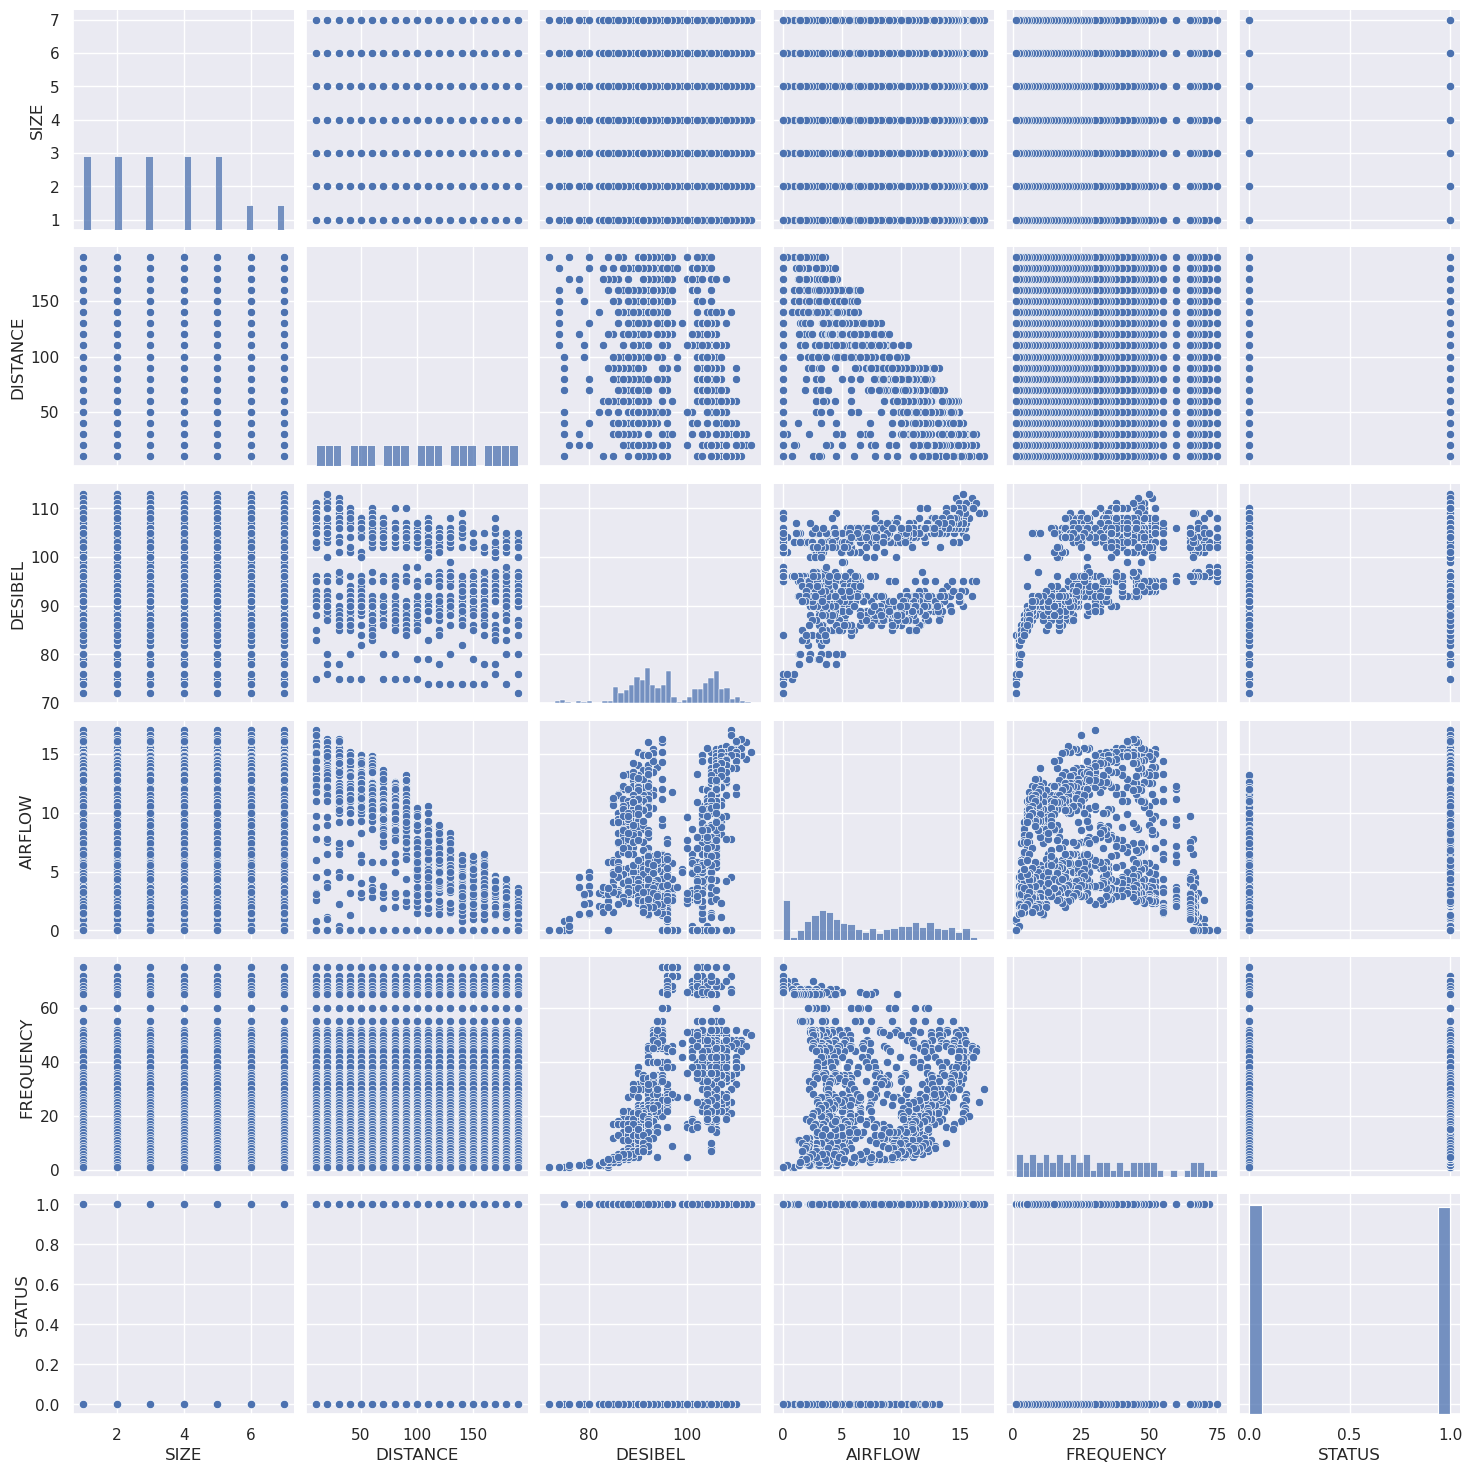

In [15]:
sns.pairplot(dataset1)
plt.show()

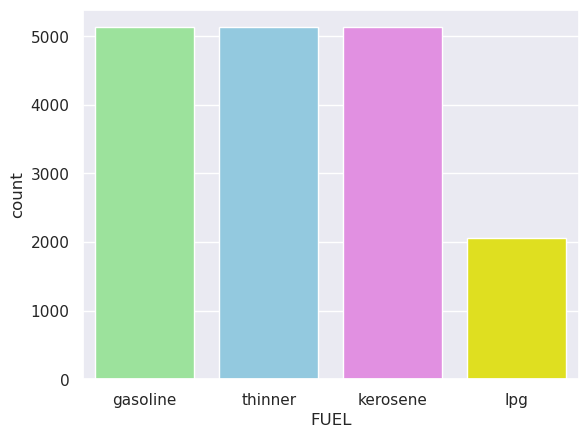

In [16]:
sns.countplot(data=dataset1,x='FUEL',palette=['lightgreen','skyblue','violet','yellow'])
plt.show()

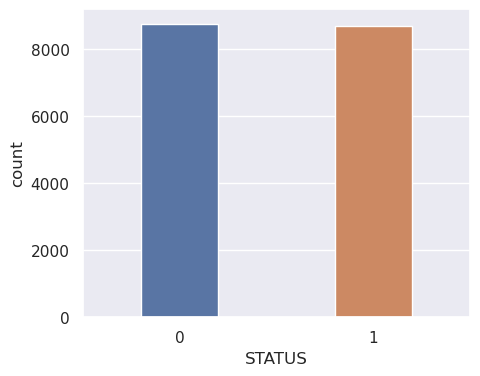

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(data=dataset1,x='STATUS',width=0.4)
plt.show()

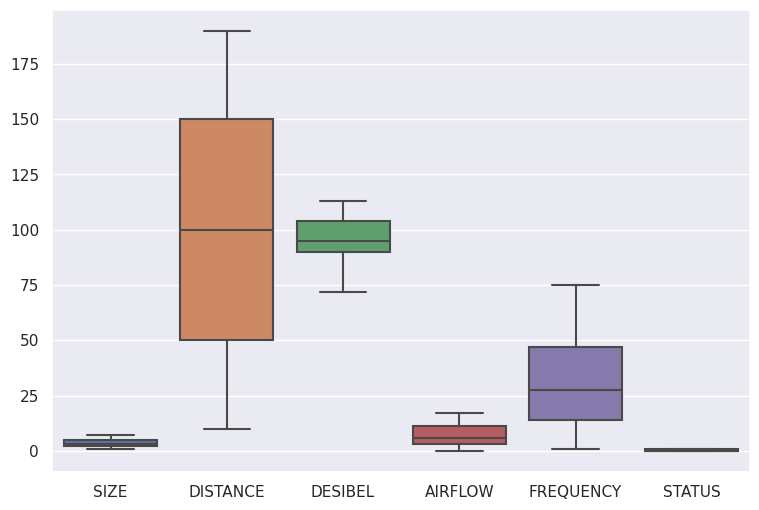

In [18]:
plt.figure(figsize=(9,6))
sns.boxplot(dataset1)
plt.show()

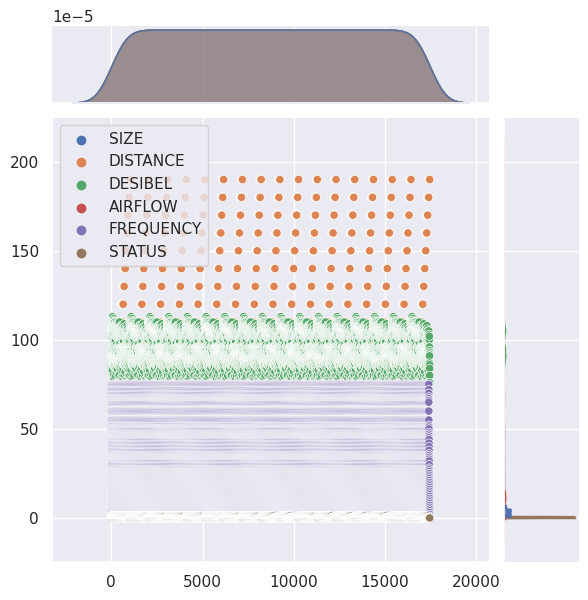

In [19]:
sns.jointplot(data=dataset1)
plt.show()

### 5. Label Encoding and Data Scaling & Transformation


In [21]:
encoder = LabelEncoder()

In [22]:
dataset['FUEL'] = encoder.fit_transform(dataset['FUEL'])

In [23]:
mapping_feature = dict(zip(dataset['FUEL'],dataset1['FUEL']))

In [24]:
mapping_feature

{0: 'gasoline', 3: 'thinner', 1: 'kerosene', 2: 'lpg'}

In [25]:
dataset['FUEL'].value_counts()

0    5130
3    5130
1    5130
2    2052
Name: FUEL, dtype: int64

### 6. Feature & Target Extraction & Splitting of data between [ train and test data]

In [26]:
dataset.head(1)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0


In [27]:
X = dataset.drop(['STATUS'],axis='columns').values
y = dataset['STATUS'].values

In [28]:
print(X.shape,y.shape)

(17442, 6) (17442,)


In [29]:
X[:5]

array([[  1. ,   0. ,  10. ,  96. ,   0. ,  75. ],
       [  1. ,   0. ,  10. ,  96. ,   0. ,  72. ],
       [  1. ,   0. ,  10. ,  96. ,   2.6,  70. ],
       [  1. ,   0. ,  10. ,  96. ,   3.2,  68. ],
       [  1. ,   0. ,  10. , 109. ,   4.5,  67. ]])

In [30]:
y[:5]

array([0, 1, 1, 1, 1])

In [31]:
scaler = StandardScaler()

In [32]:
X_scaled = scaler.fit_transform(X)

In [33]:
X_scaled[:5]

array([[-1.37742194, -1.18527552, -1.64316767, -0.04644154, -1.47288526,
         2.07220131],
       [-1.37742194, -1.18527552, -1.64316767, -0.04644154, -1.47288526,
         1.92892491],
       [-1.37742194, -1.18527552, -1.64316767, -0.04644154, -0.92390263,
         1.8334073 ],
       [-1.37742194, -1.18527552, -1.64316767, -0.04644154, -0.79721433,
         1.7378897 ],
       [-1.37742194, -1.18527552, -1.64316767,  1.545942  , -0.52272301,
         1.6901309 ]])

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42,test_size=0.3)

In [35]:
print(X_train.shape,X_test.shape)

(12209, 6) (5233, 6)


### 7. Model Architecture

In [36]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(6,)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
model_history = model.fit(X_scaled,y,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
546/546 [==============================] - 3s 3ms/step - loss: 0.2557 - accuracy: 0.8891 - val_loss: 0.1835 - val_accuracy: 0.9152
Epoch 2/30
546/546 [==============================] - 2s 4ms/step - loss: 0.1799 - accuracy: 0.9198 - val_loss: 0.1668 - val_accuracy: 0.9238
Epoch 3/30
546/546 [==============================] - 2s 3ms/step - loss: 0.1658 - accuracy: 0.9267 - val_loss: 0.1544 - val_accuracy: 0.9306
Epoch 4/30
546/546 [==============================] - 2s 4ms/step - loss: 0.1555 - accuracy: 0.9317 - val_loss: 0.1448 - val_accuracy: 0.9333
Epoch 5/30
546/546 [==============================] - 2s 4ms/step - loss: 0.1470 - accuracy: 0.9341 - val_loss: 0.1369 - val_accuracy: 0.9410
Epoch 6/30
546/546 [==============================] - 2s 3ms/step - loss: 0.1410 - accuracy: 0.9380 - val_loss: 0.1324 - val_accuracy: 0.9429
Epoch 7/30
546/546 [==============================] - 2s 3ms/step - loss: 0.1344 - accuracy: 0.9417 - val_loss: 0.1294 - val_accuracy: 0.9444
Epoch 

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.evaluate(X_test,y_test)

164/164 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9700


[0.07595068216323853, 0.9699980616569519]

### 8. Model Evaluation

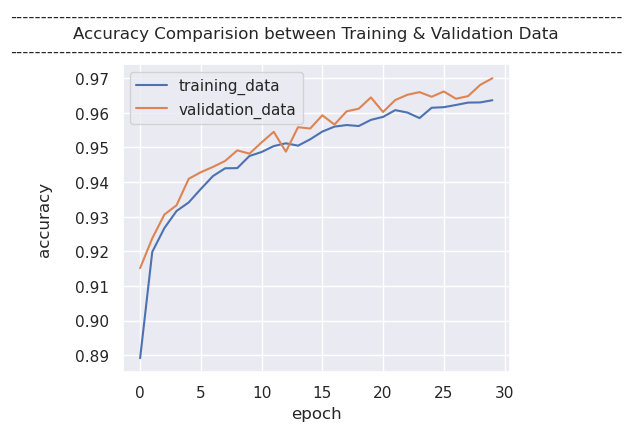

In [53]:
sns.set()
plt.figure(figsize=(5,4))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['training_data','validation_data'])
plt.title('-'*100+'\nAccuracy Comparision between Training & Validation Data\n'+'-'*100)
plt.xlabel('epoch')
plt.ylabel('accuracy\n')
plt.show()

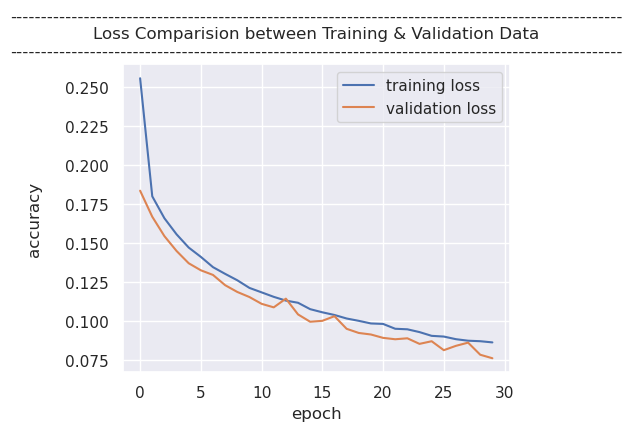

In [55]:
sns.set()
plt.figure(figsize=(5,4))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title('-'*100+'\nLoss Comparision between Training & Validation Data\n'+'-'*100)
plt.xlabel('epoch')
plt.ylabel('accuracy\n')
plt.show()

In [56]:
y_pred = model.predict(X_test)

164/164 [==============================] - 0s 2ms/step


In [57]:
y_pred_label = [1 if p>0.5 else 0 for p in y_pred]

In [58]:
y_pred_label[:10]

[0, 1, 1, 1, 0, 1, 1, 0, 1, 1]

In [70]:
print("-"*60+"\nClassification Report :-\n"+"-"*60+"\n",classification_report(y_test,y_pred_label),"\n"+"-"*60)

------------------------------------------------------------
Classification Report :-
------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2614
           1       0.98      0.96      0.97      2619

    accuracy                           0.97      5233
   macro avg       0.97      0.97      0.97      5233
weighted avg       0.97      0.97      0.97      5233
 
------------------------------------------------------------


In [60]:
matrix = confusion_matrix(y_test,y_pred_label)

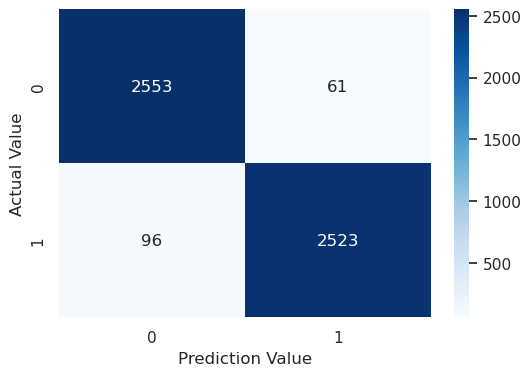

In [62]:
plt.figure(figsize=(6,4))
sns.heatmap(matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Prediction Value')
plt.ylabel('Actual Value')
plt.show()

## Building Predictive System

In [111]:
input_data = dataset1.tail(1)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
17441,7,lpg,190,72,0.0,1,0


In [89]:
input_text = input_data.values

In [90]:
input_text

array([[7, 'lpg', 190, 72, 0.0, 1, 0]], dtype=object)

In [91]:
input_text = input_text[0][:6]

In [92]:
input_text

array([7, 'lpg', 190, 72, 0.0, 1], dtype=object)

In [86]:
mapping_feature

{0: 'gasoline', 3: 'thinner', 1: 'kerosene', 2: 'lpg'}

In [100]:
for i in range(0,4):
    if mapping_feature[i] == input_text[1]:
        input_text[1] = i
        break

In [101]:
input_text

array([7, 2, 190, 72, 0.0, 1], dtype=object)

In [105]:
input_text_reshaped = input_text.reshape(1,-1)

In [107]:
print(input_text_reshaped,input_text_reshaped.shape,sep="\n")

[[7 2 190 72 0.0 1]]
(1, 6)


In [114]:
input_scaled = scaler.transform(input_text_reshaped)

In [115]:
pred = model.predict(input_scaled)

1/1 [==============================] - 0s 26ms/step


In [117]:
pred

array([[0.00018511]], dtype=float32)

In [118]:
pred_label = [1 if p>0.5 else 0 for p in pred]

In [120]:
print(f"STATUS is :- {pred_label}")

STATUS is :- [0]
